[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ahmadmsbelbeisi/MLS/blob/main/Feedforward_Neural_Networks_for_Building_energy_efficiency_prediction.ipynb)



#  Feedforward Neural Networks for Building energy efficiency prediction
---
####Machine Learning Seminar
#####Ahmad Belbeisi
######08/08/2022
---

<p class="summary">Energy efficiency prediction model using fully conected neural network.</p>

In this section, we'll construct simple fully-connected neural networks to building energy efficiency analysis. Here we predict heating-load of from each building features, such as wall-area or glazing-area. <br>
Heating/Cooling load is defined by how much energy our air conditioners need to maintain indoor temperature (unit: kWh). The more difficult it is to keep indoor temperature, the bigger Heating/CoolingLoad become.
To give an example, the size of room or building material pervious to heat (it means the building easily exchange heat with outdoor) can lead to bigger load. <br>
Please download the free data from UCI website in advance (https://archive.ics.uci.edu/ml/datasets/Energy+efficiency).



## Exploring The Dataset
Please click here to open the report
[![Exploring The Dataset](https://img.shields.io/badge/Ask%20me-anything-1abc9c.svg)](https://colab.research.google.com/github/Ahmadmsbelbeisi/MLS/blob/main/Feedforward_Neural_Networks_for_Building_energy_efficiency_prediction.ipynb)



In [ ]:
%%capture
!pip install scikit-learn graphviz ann_visualizer seaborn matplotlib pandas numpy tensorflow  # downloading packages

In [196]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
# Enable interactive plot
%matplotlib inline

In [241]:
#Download file
path = os.getcwd() + "ENB2012_data.xlsx "
if  os.path.exists(path):
    pass
else:
    !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx  --no-check-certificate
    


--2022-08-08 11:34:08--  http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76189 (74K) [application/x-httpd-php]
Saving to: ‘ENB2012_data.xlsx.7’

ENB2012_data.xlsx.7 100%[===================>]  74.40K  --.-KB/s    in 0.07s   

2022-08-08 11:34:08 (1.08 MB/s) - ‘ENB2012_data.xlsx.7’ saved [76189/76189]



In [198]:
# Naming columns 
columns = ["RelativeCompactness", "SurfaceArea", "WallArea", "RoofArea", "OverallArea",
           "Orientation", "GlazingArea", "GlazingAreaDistribution", "HeatingLoad", "CoolingLoad"]
df = pd.read_excel('ENB2012_data.xlsx', names=columns)
df.to_csv('titanic.csv', encoding='utf-8', index=False)


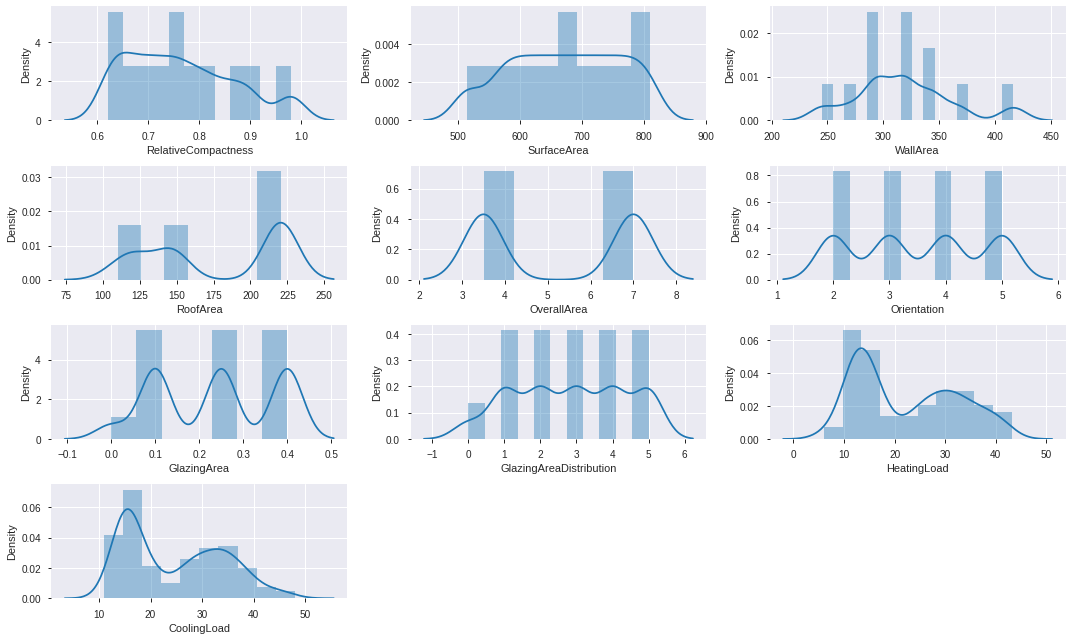

In [199]:
## Data Exploration

fig = plt.figure(figsize = (15,9))
for a,b in enumerate(df.columns):
    ax = fig.add_subplot(4,3,a+1)
    sns.distplot(df[b])
plt.tight_layout()
plt.show()

In [200]:
df.head() # inspecting data 

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallArea,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [201]:
dataset = df.copy()
dataset.tail()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallArea,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [202]:
dataset.isna().sum()

RelativeCompactness        0
SurfaceArea                0
WallArea                   0
RoofArea                   0
OverallArea                0
Orientation                0
GlazingArea                0
GlazingAreaDistribution    0
HeatingLoad                0
CoolingLoad                0
dtype: int64

In [203]:
dataset = dataset.dropna()

In [204]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [205]:
# sns.pairplot(train_dataset[["RelativeCompactness", "SurfaceArea", "WallArea", "RoofArea", "OverallArea",
#            "Orientation", "GlazingArea", "GlazingAreaDistribution", "HeatingLoad", "CoolingLoad"]], diag_kind='kde')

In [206]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RelativeCompactness,614.0,0.767883,0.106370,0.62,0.6900,0.76,0.860,0.98
SurfaceArea,614.0,668.442997,88.301029,514.50,588.0000,661.50,735.000,808.50
WallArea,614.0,319.098534,44.371316,245.00,294.0000,318.50,343.000,416.50
RoofArea,614.0,174.672231,45.265160,110.25,122.5000,147.00,220.500,220.50
OverallArea,614.0,5.324104,1.749856,3.50,3.5000,7.00,7.000,7.00
Orientation,614.0,3.460912,1.106530,2.00,2.0000,3.00,4.000,5.00
GlazingArea,614.0,0.235179,0.131872,0.00,0.1000,0.25,0.400,0.40
GlazingAreaDistribution,614.0,2.856678,1.538727,0.00,2.0000,3.00,4.000,5.00
HeatingLoad,614.0,22.655726,10.066755,6.01,13.0800,21.15,32.085,43.10
CoolingLoad,614.0,24.916026,9.453566,10.90,15.7775,24.92,33.155,48.03


In [207]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
RelativeCompactness,0.767883,0.106370
SurfaceArea,668.442997,88.301029
WallArea,319.098534,44.371316
RoofArea,174.672231,45.265160
OverallArea,5.324104,1.749856
Orientation,3.460912,1.106530
GlazingArea,0.235179,0.131872
GlazingAreaDistribution,2.856678,1.538727
HeatingLoad,22.655726,10.066755
CoolingLoad,24.916026,9.453566


Text(0, 0.5, 'HeatingLoad')

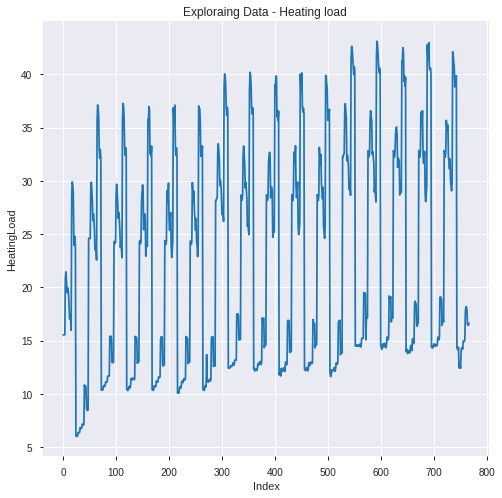

In [208]:
plt.figure(figsize=(8, 8))
plt.plot(df["HeatingLoad"])
plt.title('Exploraing Data - Heating load '),
plt.xlabel('Index'),
plt.ylabel('HeatingLoad')

In [209]:
data = df.copy()
data = data.dropna()
for col in data.columns:
    v_std = df[col].std()
    v_mean = df[col].mean()
    data[col] = (data[col] - v_mean) / v_std

In [210]:
data.head()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallArea,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-1.340767,-1.7593,-1.813393,-0.669679,-0.342443
1,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-0.446922,-1.7593,-1.813393,-0.669679,-0.342443
2,2.040447,-1.784712,-0.561586,-1.469119,0.999349,0.446922,-1.7593,-1.813393,-0.669679,-0.342443
3,2.040447,-1.784712,-0.561586,-1.469119,0.999349,1.340767,-1.7593,-1.813393,-0.669679,-0.342443
4,1.284142,-1.228438,0.000000,-1.197897,0.999349,-1.340767,-1.7593,-1.813393,-0.145408,0.388113


In [211]:
# # Convert to numpy and selecting Features and Targets
features = data.drop(['HeatingLoad','CoolingLoad'], axis=1).values
targets = data['HeatingLoad'].values[:,None]

In [212]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
train_x, test_x, train_y, test_y = train_test_split(features,targets, test_size=1 - train_ratio, random_state=1)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
valid_x, x_test1, valid_y, test_y1 = train_test_split(test_x, test_y, test_size=test_ratio/(test_ratio + validation_ratio), random_state=1) 
train_i = np.array(range(len(train_x)))  # index, used for random batch sampling
# print(train_x, valid_x, x_test)

In [213]:
print('train', train_x.shape, train_y.shape)
print('valid', valid_x.shape, valid_y.shape)
print('test', test_x.shape, test_y.shape)

train (537, 8) (537, 1)
valid (115, 8) (115, 1)
test (231, 8) (231, 1)


In [214]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

In [215]:


def fwd(x, W_hid, W_out):
    assert x.ndim == 2
    assert W_hid.ndim == 2
    assert W_out.ndim == 2

    z_hid = x @ W_hid 
    h_hid = sigmoid(z_hid)                              # hidden output

    z_out = h_hid @ W_out
    y_hat = z_out                                       # linear output

    return y_hat, z_hid, h_hid                          # z_hid and h_hid required for backprop

In [216]:
def MSE(y, y_hat):                                      # no innner sum, 
    return np.mean((y-y_hat)**2)                        # becouse only one output column

In [217]:
def backprop(x, y, W_hid, W_out):
    assert x.ndim == 2
    assert y.ndim == 2
    assert W_hid.ndim == 2
    assert W_out.ndim == 2
    
    y_hat, z_hid, h_hid = fwd(x, W_hid, W_out)
    
    ro_out = -(y-y_hat)                                 # no transfer function
    dW_out = h_hid.T @ ro_out
    
    ro_hid = (ro_out @ W_out.T) * sigmoid_deriv(z_hid)
    dW_hid = x.T @ ro_hid
    
    return dW_hid, dW_out, y_hat

In [218]:

n_in = train_x.shape[1]
n_hid = 4
n_out = train_y.shape[1]
lr = 0.01
n_batch = 800
iterations = 3000

In [219]:

np.random.seed(0)

# Initialize weights
W_hid = np.random.normal(0.0, n_in**-.5, [n_in, n_hid])
W_out = np.random.normal(0.0, n_hid**-.5, [n_hid, n_out])




In [270]:
losses = {'train':[], 'valid':[]}                        # keep history for plotting

for i in range(iterations):
    
    # Get mini-batch, both as 2d arrays
    batch = np.random.choice(train_i, n_batch)
    x = train_x[batch]
    y = train_y[batch]
    

    dW_hid, dW_out, y_hat = backprop(x, y, W_hid, W_out)
    W_hid += -lr * dW_hid / n_batch                      # Apply gradient
    W_out += -lr * dW_out / n_batch
    # Keep train loss (on mini-bNatch) and calculate validation loss
    train_loss = MSE(y, y_hat)
    losses['train'].append(train_loss)
    train_y_hat, _, _ = fwd(train_x, W_hid, W_out)
    valid_y_hat, _, _ = fwd(valid_x, W_hid, W_out)
    valid_loss = MSE(valid_y, valid_y_hat)
    losses['valid'].append(valid_loss)
    test_y_hat, _, _ = fwd(test_x, W_hid, W_out)
    


      



    



In [279]:
# print(len(list(set(losses['valid']))))
accuracy_Valid = 1-valid_loss
accuracy_train = 1 -train_loss
print("Training Accuracy=",accuracy_train,"\n validation Accuracy=",accuracy_Valid)

Training Accuracy= 0.9157348250381105 
 validation Accuracy= 0.8841183750553275


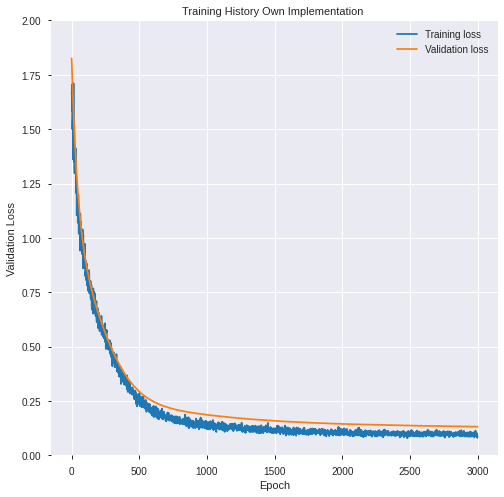

In [261]:
plt.figure(figsize=(8, 8))
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['valid'], label='Validation loss')

plt.title('Training History Own Implementation ', fontsize=11),
plt.xlabel('Epoch', fontsize=11),
plt.ylabel('Validation Loss', fontsize=11)
plt.legend()
plt.ylim(0, 2)
plt.savefig('/content/Figs/Training_History_Own_Implementation.png', dpi=fig.dpi)
plt.show()


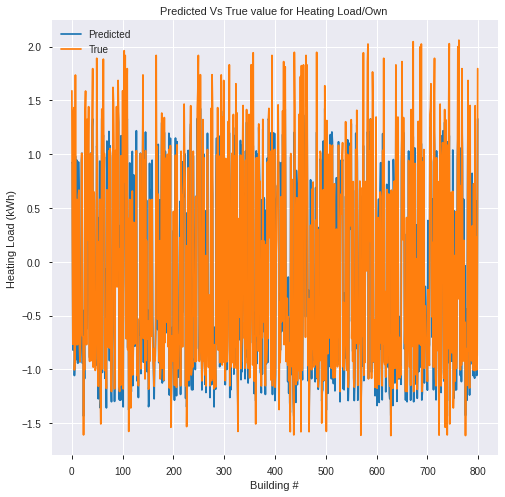

In [245]:
plt.figure(figsize=(8, 8))
plt.plot(y_hat, label = "Predicted")
plt.plot(y, label = "True")
plt.title('Predicted Vs True value for Heating Load/Own ', fontsize=11),
plt.xlabel('Building #', fontsize=11),
plt.ylabel('Heating Load (kWh)', fontsize=11)
plt.legend()
plt.savefig('/content/Figs/Predicted_Vs_True_value_for_Heating_Load_Own.png', dpi=fig.dpi)

validation Set R-Square= 0.9082654215905457


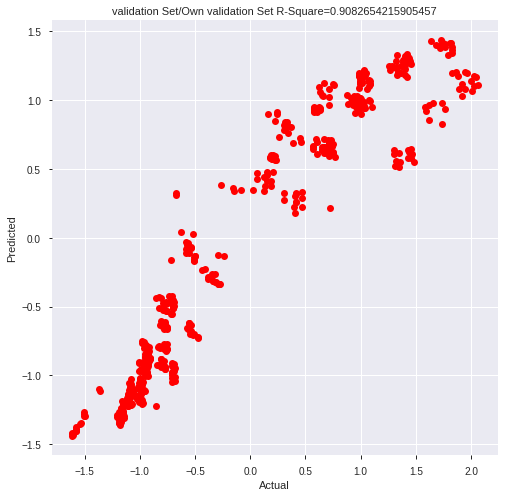

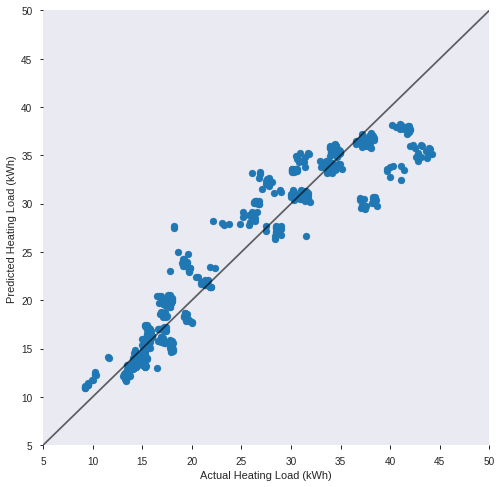

In [246]:
# Plot actual vs prediction for validation set
plt.figure(figsize=(8, 8))
plt.plot(train_y,train_y_hat,'ro')
plt.title(f"validation Set/Own validation Set R-Square={str(TestR2Value)}", fontsize=11)

plt.xlabel('Actual', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.savefig('/content/Figs/validation_Set_Own.png', dpi=fig.dpi)
# convert standardized heating-load to its original unit
heating_load_true = train_y[:, 0].reshape(-1, 1) * v_std + v_mean
heating_load_pred = train_y_hat * v_std + v_mean
plt.figure(figsize=(8, 8))
plt.plot([5, 50], [5, 50], c='k', alpha=0.6) # diagonal line
plt.scatter(heating_load_true, heating_load_pred)
plt.xlim(5, 50)
plt.ylim(5, 50)
plt.xlabel('Actual Heating Load (kWh)', fontsize=11)
plt.ylabel('Predicted Heating Load (kWh)', fontsize=11)
plt.grid()
plt.savefig('/content/Figs/Own.png', dpi=fig.dpi)
# Compute R-Square value for training set
TestR2Value = r2_score(y,y_hat)
print("validation Set R-Square=", TestR2Value)

testing Set R-Square= 0.8727860205841618


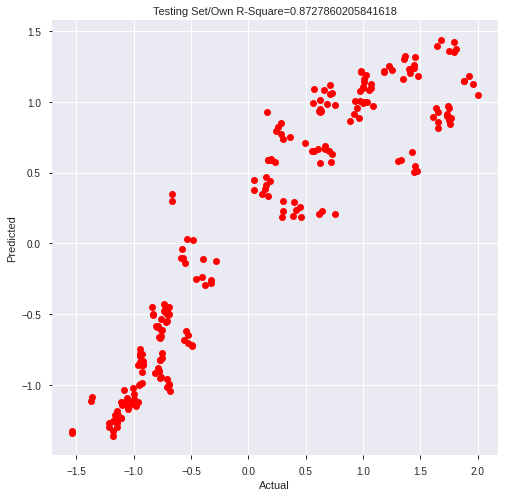

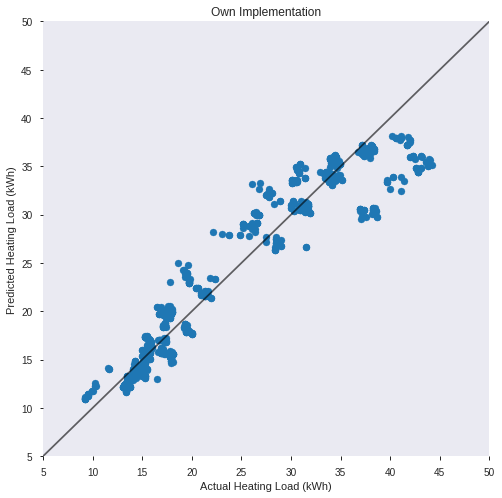

In [265]:
# Compute R-Square value for training set
TestR2Value = r2_score(test_y, test_y_hat)
print("testing Set R-Square=", TestR2Value)

# Plot actual vs prediction for testing set
plt.figure(figsize=(8, 8))
plt.plot(test_y, test_y_hat,'ro')
plt.title(f"Testing Set/Own R-Square={str(TestR2Value)}", fontsize=11)
plt.xlabel('Actual', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.savefig('/content/Figs/Testing_Set_Own.png', dpi=fig.dpi)
# convert standardized heating-load to its original unit
heating_load_true = y[:, 0].reshape(-1, 1) * v_std + v_mean
heating_load_pred = y_hat * v_std + v_mean
plt.figure(figsize=(8, 8))
plt.plot([5, 50], [5, 50], c='k', alpha=0.6) # diagonal line
plt.scatter(heating_load_true, heating_load_pred)
plt.xlim(5, 50)
plt.ylim(5, 50)
plt.title('Own Implementation')
plt.xlabel('Actual Heating Load (kWh)', fontsize=11)
plt.ylabel('Predicted Heating Load (kWh)', fontsize=11)
plt.grid()
plt.savefig('/content/Figs/Own_Implementation.png', dpi=fig.dpi)



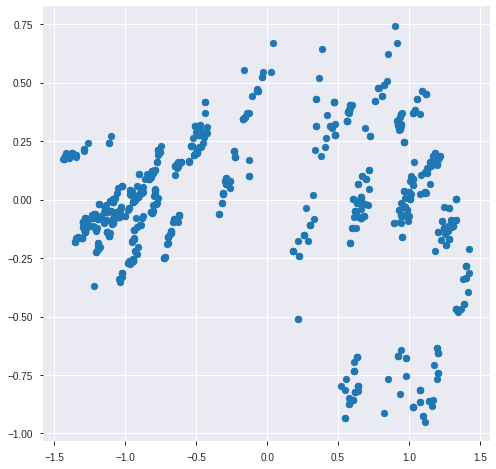

In [248]:
residual=y_hat-y
plt.figure(figsize=(8, 8))
plt.scatter(y=residual,x=y_hat)

Testing Set R-Square= 0.9082654215905457


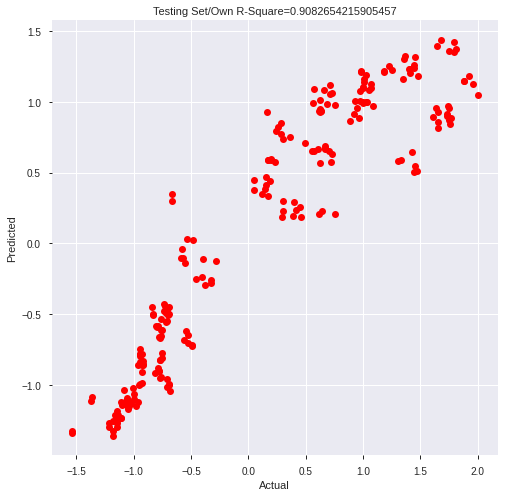

In [249]:
# Plot actual vs prediction for testing set
plt.figure(figsize=(8, 8))
plt.plot(test_y, test_y_hat,'ro')
plt.title(f"Testing Set/Own R-Square={str(TestR2Value)}", fontsize=11)
plt.xlabel('Actual', fontsize=11)
plt.ylabel('Predicted', fontsize=11)

# Compute R-Square value for testing set
TestR2Value = r2_score(test_y, test_y_hat)
print("Testing Set R-Square=", TestR2Value)

Validation Set R-Square= 0.8644468358963449


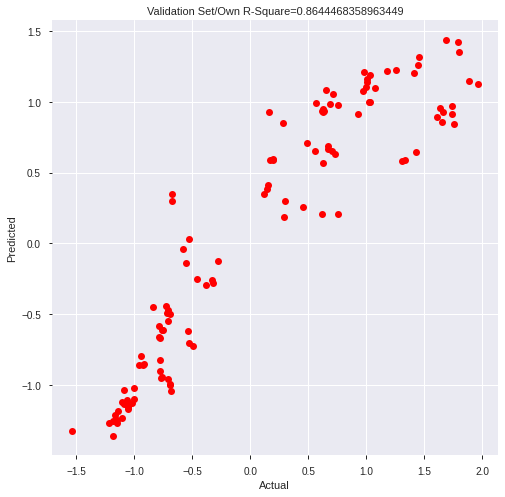

In [250]:

# Compute R-Square value for validation set
TestR2Value = r2_score(valid_y, valid_y_hat)
print("Validation Set R-Square=", TestR2Value)
# Plot actual vs prediction for validation set
plt.figure(figsize=(8, 8))
plt.plot(valid_y, valid_y_hat,'ro')
plt.title(f"Validation Set/Own R-Square={str(TestR2Value)}", fontsize=11)
plt.xlabel('Actual', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.savefig('/content/Figs/Validation_Set_Own_Implementation.png', dpi=fig.dpi)

Training Set R-Square= 0.8727860205841618


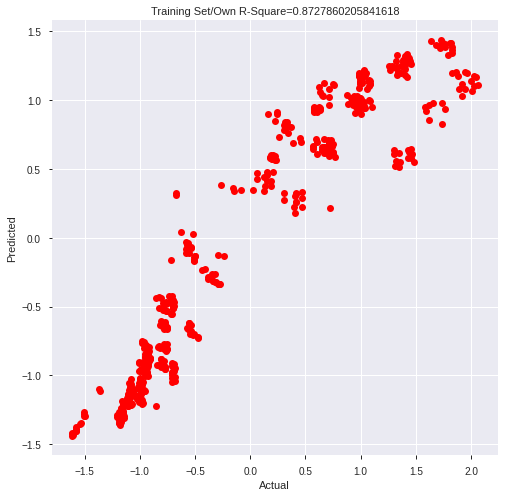

In [251]:
# Compute R-Square value for training set
TestR2Value = r2_score(test_y, test_y_hat)
print("Training Set R-Square=", TestR2Value)
# Plot actual vs prediction for training set
plt.figure(figsize=(8, 8))
plt.plot(train_y, train_y_hat,'ro')
plt.title(f"Training Set/Own R-Square={str(TestR2Value)}", fontsize=11)
plt.xlabel('Actual', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.savefig('/content/Figs/Training_Set_Own_Implementation.png', dpi=fig.dpi)


In [234]:
# Create your first MLP in Keras
# imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from tensorflow.keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
# Read data from csv file for training and validation data
# Split into input (X) and output (Y) variables
X1 = train_x
Y1 = train_y

X2 = valid_x
Y2 = valid_y
# Create model
model = Sequential()
# model.add(Dense(8, activation="relu", input_dim=8))
# model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu", input_dim=8))

# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error')

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X1, Y1, validation_data=(X2, Y2), epochs=3000, batch_size=128, verbose=2, callbacks=[es])

# Calculate predictions
PredTestSet = model.predict(X1)
PredValSet = model.predict(X2)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
5/5 - 0s - loss: 0.0639 - val_loss: 0.0901 - 145ms/epoch - 29ms/step
Epoch 502/3000
5/5 - 0s - loss: 0.0641 - val_loss: 0.0903 - 68ms/epoch - 14ms/step
Epoch 503/3000
5/5 - 0s - loss: 0.0642 - val_loss: 0.0904 - 63ms/epoch - 13ms/step
Epoch 504/3000
5/5 - 0s - loss: 0.0641 - val_loss: 0.0904 - 66ms/epoch - 13ms/step
Epoch 505/3000
5/5 - 0s - loss: 0.0641 - val_loss: 0.0903 - 67ms/epoch - 13ms/step
Epoch 506/3000
5/5 - 0s - loss: 0.0641 - val_loss: 0.0907 - 71ms/epoch - 14ms/step
Epoch 507/3000
5/5 - 0s - loss: 0.0642 - val_loss: 0.0902 - 79ms/epoch - 16ms/step
Epoch 508/3000
5/5 - 0s - loss: 0.0640 - val_loss: 0.0904 - 103ms/epoch - 21ms/step
Epoch 509/3000
5/5 - 0s - loss: 0.0643 - val_loss: 0.0908 - 134ms/epoch - 27ms/step
Epoch 510/3000
5/5 - 0s - loss: 0.0642 - val_loss: 0.0907 - 127ms/epoch - 25ms/step
Epoch 511/3000
5/5 - 0s - loss: 0.0640 - val_loss: 0.0909 - 73ms/epoch - 15ms/step
Epoch 512/3000
5/5 - 0s - loss: 

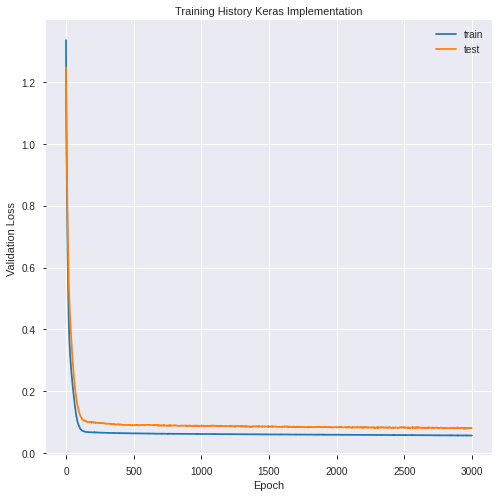

In [259]:
# Plot training history
plt.figure(figsize=(8, 8))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.title("Training History Keras Implementation", fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Validation Loss', fontsize=11)
plt.savefig('/content/Figs/Training_History_Keras_Implementation.png', dpi=fig.dpi)
pyplot.show()


In [285]:
accuracy_Valid = 1-min(history.history['val_loss'])
accuracy_train = 1-min(history.history['loss'])
print("Training Accuracy=",accuracy_train,"\n validation Accuracy=",accuracy_Valid)

Training Accuracy= 0.9429879076778889 
 validation Accuracy= 0.9204258024692535


Training Set R-Square= 0.9427002777863176


0.0

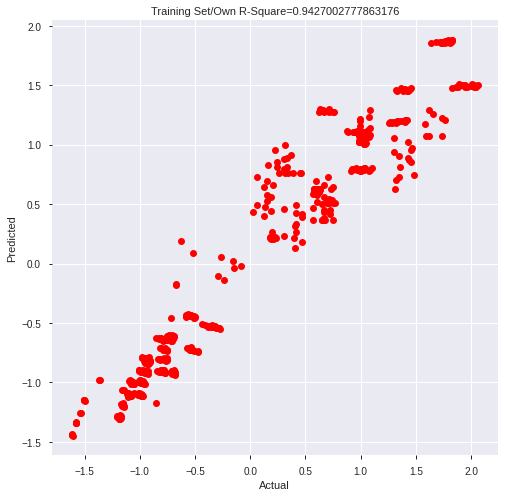

In [272]:

# Plot actual vs prediction for training set
plt.figure(figsize=(8, 8))
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
# Compute R-Square value for training set
TestR2Value = r2_score(Y1,TestResults)
print("Training Set R-Square=", TestR2Value)
plt.plot(Y1,TestResults,'ro')
plt.title(f"Training Set/Own R-Square={str(TestR2Value)}", fontsize=11)
plt.xlabel('Actual', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.savefig('/content/Figs/Training_set_Keras_Implementation.png', dpi=fig.dpi)



In [237]:
from ann_visualizer.visualize import ann_viz;
from ann_visualizer.visualize import ann_viz
from graphviz import Source
ann_viz(model, title="Keras Implementation neural network")
graph_source = Source.from_file('network.gv')
fie_ext = 'png'
temp_img = 'Keras_Implementation_neural_network'
graph_source.render(temp_img,format=fie_ext, view=False)

'Keras_Implementation_neural_network.png'

Validation Set R-Square= 0.9166705220056709


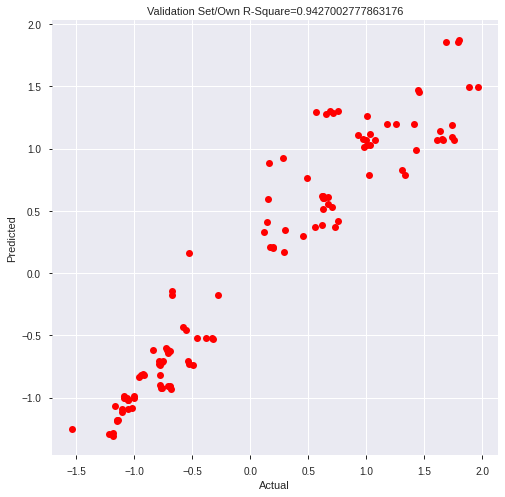

In [255]:
# Plot actual vs prediction for validation set
plt.figure(figsize=(8, 8))
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
# Compute R-Square value for validation set
ValR2Value = r2_score(Y2,ValResults)
print("Validation Set R-Square=",ValR2Value)
plt.plot(Y2,ValResults,'ro')
plt.title(f"Validation Set/Own R-Square={str(TestR2Value)}", fontsize=11)
plt.xlabel('Actual', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.savefig('/content/Figs/Validation_set_Keras_Implementation.png', dpi=fig.dpi)

Training Set R-Square= 0.9082654215905457


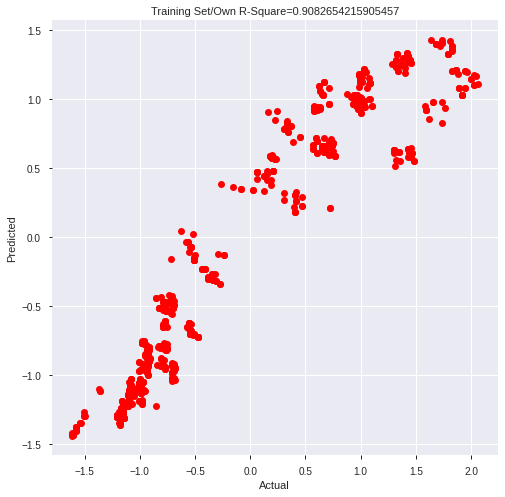

In [256]:
# Plot actual vs prediction for training set
plt.figure(figsize=(8, 8))
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
# Compute R-Square value for training set
TestR2Value = r2_score(y,y_hat)
print("Training Set R-Square=", TestR2Value)
plt.plot(y,y_hat,'ro')
plt.title(f"Training Set/Own R-Square={str(TestR2Value)}", fontsize=11)
plt.xlabel('Actual', fontsize=11)
plt.ylabel('Predicted', fontsize=11)

plt.savefig('/content/Figs/Training_set_Keras_Implementation.png', dpi=fig.dpi)

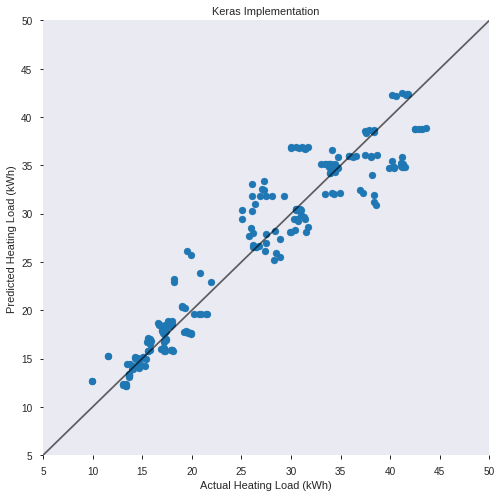

In [257]:

# predict test value

y_pred = model.predict(test_x)

# convert standardized heating-load to its original unit
heating_load_true = test_y[:, 0].reshape(-1, 1) * v_std + v_mean
heating_load_pred = y_pred * v_std + v_mean

plt.figure(figsize=(8, 8))
plt.plot([5, 50], [5, 50], c='k', alpha=0.6) # diagonal line
plt.scatter(heating_load_true, heating_load_pred)
plt.xlim(5, 50)
plt.ylim(5, 50)
plt.title('Keras Implementation', fontsize=11)
plt.xlabel('Actual Heating Load (kWh)', fontsize=11)
plt.ylabel('Predicted Heating Load (kWh)', fontsize=11)
plt.grid()
plt.savefig('/content/Figs/Keras_Implementation.png', dpi=fig.dpi)

In [258]:
!zip -r Figs.zip  /content/Figs

updating: content/Figs/ (stored 0%)
updating: content/Figs/validation_Set_Own.png (deflated 8%)
updating: content/Figs/Own_Implementation.png (deflated 7%)
updating: content/Figs/Testing_Set_Own.png (deflated 9%)
updating: content/Figs/Training_History_Keras_Implementation.png (deflated 83%)
updating: content/Figs/Training_Set_Own_Implementation.png (deflated 8%)
updating: content/Figs/Training_set_Keras_Implementation.png (deflated 8%)
updating: content/Figs/Keras_Implementation.png (deflated 7%)
updating: content/Figs/Validation_Set_Own_Implementation.png (deflated 12%)
updating: content/Figs/Validation_set_Keras_Implementation.png (deflated 13%)
updating: content/Figs/Predicted_Vs_True_value_for_Heating_Load_Own.png (deflated 2%)
updating: content/Figs/Keras_Implementation_neural_network.png (deflated 11%)
updating: content/Figs/Own.png (deflated 7%)
updating: content/Figs/Training_History_Own_Implementation.png (deflated 83%)
